### Digital Humanities First Assignment:

Input:

Output:


In [2]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../1/data/feeding-america.csv", index_col = 'date')
#test_data = pd.read_csv("data/mnist-csv-format/mnist_test.csv", header=0)

df.head()

,book_id,ethnicgroup,recipe_class,region,ingredients
date,,,,,
1922,fofb.xml,mexican,soups,ethnic,chicken;green pepper;rice;salt;water
1922,fofb.xml,mexican,meatfishgame,ethnic,chicken;rice
1922,fofb.xml,mexican,soups,ethnic,allspice;milk
1922,fofb.xml,mexican,fruitvegbeans,ethnic,breadcrumb;cheese;green pepper;pepper;salt;sar...
1922,fofb.xml,mexican,eggscheesedairy,ethnic,butter;egg;green pepper;onion;parsley;pepper;s...


In [3]:
print(len(df))        #Number of receipes

48032


In [4]:
print(df['recipe_class'].unique())

['soups' 'meatfishgame' 'fruitvegbeans' 'eggscheesedairy' 'breadsweets'
 'beverages' 'accompaniments' 'medhealth']


In [5]:
df['recipe_class'].value_counts()

breadsweets        14630
meatfishgame       11477
fruitvegbeans       7085
accompaniments      5495
eggscheesedairy     4150
soups               2631
beverages           2031
medhealth            533
Name: recipe_class, dtype: int64

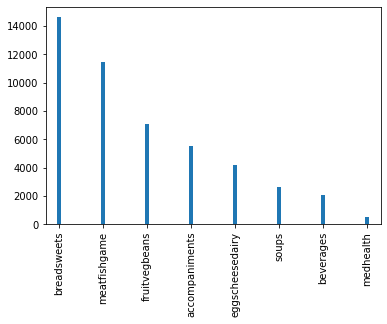

In [6]:
df['recipe_class'].value_counts().plot(kind='bar', color="C0", width=0.1)
plt.show()

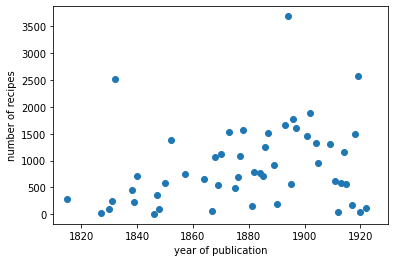

In [7]:
grouped = df.groupby('date')
recipe_counts = grouped.size()
recipe_counts.plot(style='o', xlim=(1810, 1930))
plt.ylabel("number of recipes")
plt.xlabel("year of publication")
plt.show()

In [12]:
#df1  = df.copy()
#df1['ingredients'] = df['ingredients'].str.split(';')
#grouped = df1[['date', 'ingredients']].groupby('date')


#for key, item in grouped:
 #   print(grouped.get_group(key), "\n\n")
    
ingredients = df['ingredients'].str.split(';')
# group all rows from the same year
groups = ingredients.groupby('date')
# merge the lists from the same year
ingredients = groups.sum()
# compute counts per year
ingredients = ingredients.apply(pd.Series.value_counts)
# normalise the counts
ingredients = ingredients.divide(recipe_counts, 0)

ingredients.head()

,butter,salt,water,flour,nutmeg,pepper,lemon,sugar,mace,egg,...,farina cream,pearl grit,virginia ham,newburg sauce,rock cod fillet,perch fillet,tournedo,avocado,lime yeast,dried flower
date,,,,,,,,,,,,,,,,,,,,,
1803,0.570796,0.435841,0.409292,0.351770,0.272124,0.267699,0.205752,0.205752,0.188053,0.150442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,0.357374,0.349839,0.395048,0.219591,0.132400,0.194833,0.104413,0.274489,0.134553,0.177610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,0.531401,0.371981,0.391304,0.352657,0.260870,0.149758,0.115942,0.396135,0.140097,0.294686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,0.398551,0.315217,0.322464,0.431159,0.152174,0.083333,0.018116,0.387681,0.036232,0.347826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NaN,0.066667,0.600000,NaN,0.033333,0.033333,0.200000,0.400000,NaN,0.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


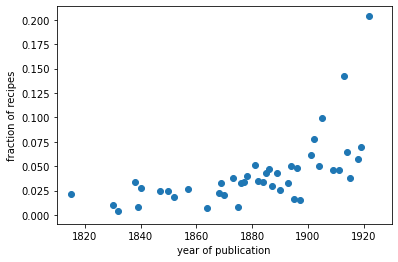

In [13]:
ax = ingredients['tomato'].plot(style='o', xlim=(1810, 1930))
ax.set_ylabel("fraction of recipes")
ax.set_xlabel("year of publication");


In [14]:
import scipy.stats

def plot_trend(column, df, line_color='grey', xlim=(1810, 1930)):
    slope, intercept, _, _, _ = scipy.stats.linregress(
        df.index, df[column].fillna(0).values)
    ax = df[column].plot(style='o', label=column)
    ax.plot(df.index, intercept + slope * df.index, '--',
             color=line_color, label='_nolegend_')
    ax.set_ylabel("fraction of recipes")
    ax.set_xlabel("year of publication")
    ax.set_xlim(xlim)

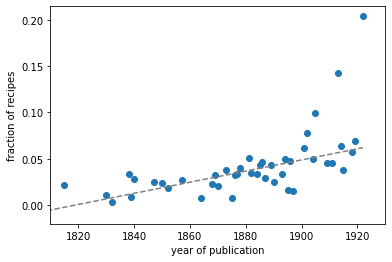

In [27]:
plot_trend('tomato', ingredients)
plt.show()

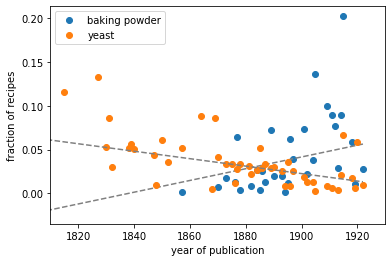

In [18]:
plot_trend('baking powder', ingredients)
plot_trend('yeast', ingredients)
plt.legend();  # add a legend to the plot


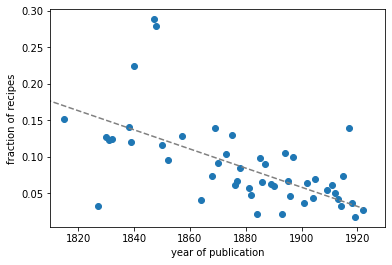

In [19]:
plot_trend('nutmeg', ingredients)

In [20]:
from sklearn.feature_selection import chi2

# Transform the index into a list of labels, in which each label
# indicates whether a row stems from before or after the Civil War:
labels = ['Pre-Civil War' if year < 1864 else 'Post-Civil War' for year in ingredients.index]
# replace missing values with zero (.fillna(0)),
# and compute the chi2 statistic:
keyness, _ = chi2(ingredients.fillna(0), labels)
# Turn keyness values into a Series, and sort in descending order:
keyness = pd.Series(keyness, index=ingredients.columns).sort_values(ascending=False)

In [21]:
keyness.head(n=10)

nutmeg           1.072078
rice water       1.057412
loaf sugar       1.057213
mace             0.955977
pearlash         0.759318
lemon peel       0.694849
baking powder    0.608744
soda             0.589730
vanilla          0.533900
gravy            0.453685
dtype: float64

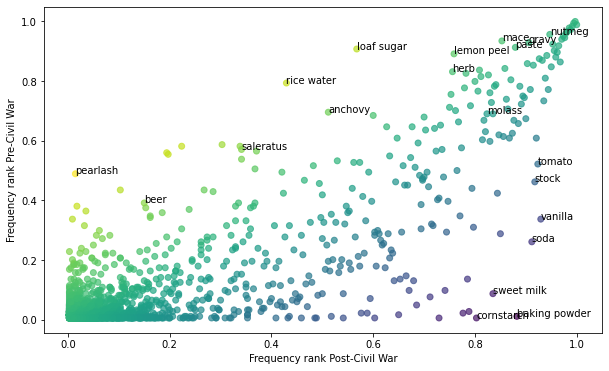

In [22]:
# step 1: compute summed ingredient counts per year
counts = df['ingredients'].str.split(';').groupby(
    'date').sum().apply(pd.Series.value_counts).fillna(0)

# step 2: construct frequency rankings for pre- and post-war years
pre_cw = counts[counts.index < 1864].sum().rank(method='dense', pct=True)
post_cw = counts[counts.index > 1864].sum().rank(method='dense', pct=True)

# step 3: merge the pre- and post-war data frames
rankings = pd.DataFrame({'Pre-Civil War': pre_cw, 'Post-Civil War': post_cw})

# step 4: produce the plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(rankings['Post-Civil War'], rankings['Pre-Civil War'],
            c=rankings['Pre-Civil War'] - rankings['Post-Civil War'],
            alpha=0.7)

# Add annotations of the 20 most distinctive ingredients
for i, row in rankings.loc[keyness.head(20).index].iterrows():
    plt.annotate(i, xy=(row['Post-Civil War'], row['Pre-Civil War']))

plt.xlabel("Frequency rank Post-Civil War")
plt.ylabel("Frequency rank Pre-Civil War");


In [24]:
df['ethnicgroup'].value_counts(dropna=False).head(10)

NaN         41432
jewish       3418
creole        939
french        591
oriental      351
italian       302
english       180
german        153
spanish       123
chinese        66
Name: ethnicgroup, dtype: int64

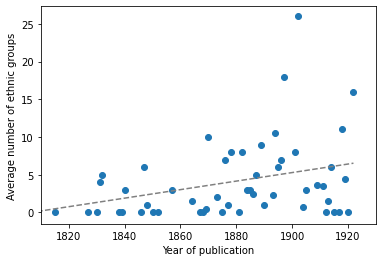

In [25]:
grouped = df.groupby(level='date')
# compute the number of unique ethnic groups per year,
# divided by the number of books
n_groups = grouped['ethnicgroup'].nunique() / grouped['book_id'].nunique()
n_groups.plot(style='o')

# add a least square line as reference
slope, intercept, _, _, _ = scipy.stats.linregress(
    n_groups.index, n_groups.fillna(0).values)

# create the plot
plt.plot(
    n_groups.index, intercept + slope * n_groups.index, '--', color="grey")
plt.xlim(1810, 1930)
plt.ylabel("Average number of ethnic groups")
plt.xlabel("Year of publication");

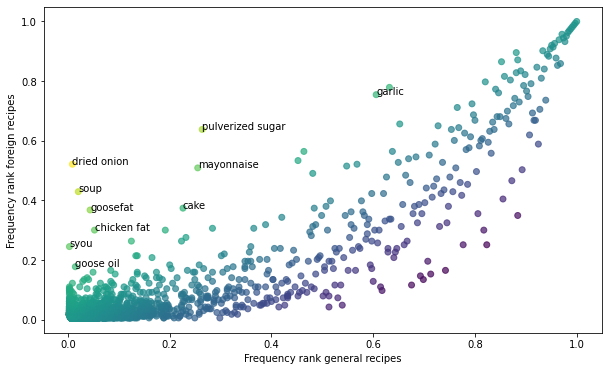

In [26]:
# step 1: add a new column indicating for each recipe whether
#         we have information about its ethnic group
df['foreign'] = df['ethnicgroup'].notnull()

# step 2: construct frequency rankings for foreign and general recipes
counts = df.groupby('foreign')['ingredients'].apply(
    ';'.join).str.split(';').apply(pd.Series.value_counts).fillna(0)

foreign_counts = counts.iloc[1].rank(method='dense', pct=True)
general_counts = counts.iloc[0].rank(method='dense', pct=True)

# step 3: merge the foreign and general data frames
rankings = pd.DataFrame({'foreign': foreign_counts, 'general': general_counts})

# step 4: compute the keyness of ingredients in foreign recipes
#         as the difference in frequency ranks
keyness = (rankings['foreign'] - rankings['general']).sort_values(ascending=False)

# step 5: produce the plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(rankings['general'], rankings['foreign'],
            c=rankings['foreign'] - rankings['general'],
            alpha=0.7)

for i, row in rankings.loc[keyness.head(10).index].iterrows():
    plt.annotate(i, xy=(row['general'], row['foreign']))

plt.xlabel("Frequency rank general recipes")
plt.ylabel("Frequency rank foreign recipes");
